In [1]:
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [25]:
df=pd.read_csv("retail_sales_dataset.csv")

In [26]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [27]:
df.tail()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [29]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [30]:
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [31]:
df.duplicated().sum()

0

In [32]:
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [33]:
df['Date'] = pd.to_datetime(df['Date'])
df['year']=df['Date'].dt.year
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,year
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,2023
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2023
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,2023
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,2023
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,2023
...,...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50,2023
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90,2023
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100,2023
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150,2023


In [35]:
df['Month']=df['Date'].dt.month
df['Day']=df['Date'].dt.day_name()
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,year,Month,Day
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,2023,11,Friday
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2023,2,Monday
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,2023,1,Friday
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,2023,5,Sunday
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,2023,5,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50,2023,5,Tuesday
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90,2023,11,Friday
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100,2023,10,Sunday
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150,2023,12,Tuesday


In [36]:
np.unique(df['year'])


array([2023, 2024], dtype=int64)

In [37]:
df['year'].value_counts()

2023    998
2024      2
Name: year, dtype: int64

In [40]:
df['Date'] = pd.to_datetime(df['Date']) 
df = df[df['Date'].dt.year != 2024]

In [41]:
df['year'].value_counts()

2023    998
Name: year, dtype: int64

In [80]:
most_selling_months=df["Month"].value_counts()
most_selling_months

May          105
October       96
August        94
December      91
April         86
February      85
November      78
June          77
January       76
March         73
July          72
September     65
Name: Month, dtype: int64

In [83]:
df[df['Month'] == 'May'].groupby('Product Category')['Total Amount'].sum()

Product Category
Beauty         12450
Clothing       17455
Electronics    23245
Name: Total Amount, dtype: int64

In [85]:
df[df['Month'] == 'May'].groupby('Product Category')['Quantity'].sum()

Product Category
Beauty         65
Clothing       97
Electronics    97
Name: Quantity, dtype: int64

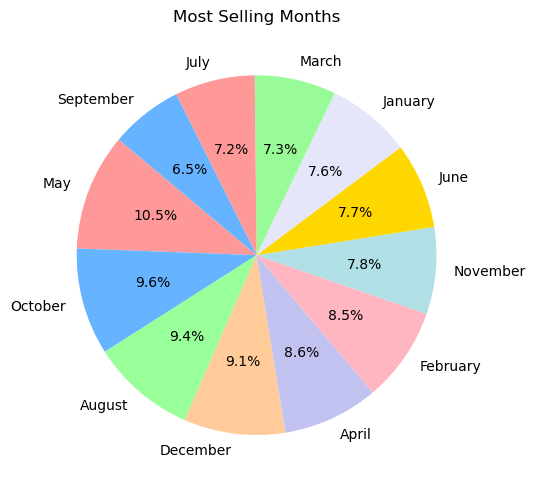

In [77]:
plt.figure(figsize=(10,5))
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#C2C2F0', 
          '#FFB6C1', '#B0E0E6', '#FFD700', '#E6E6FA', '#98FB98']
plt.title('Most Selling Months')
plt.pie(most_selling_months , labels=most_selling_months.index , colors=colors,autopct='%1.1f%%', 
        startangle=140
        )

plt.tight_layout()
plt.show()

In [43]:
month_total=df.groupby("Month")["Total Amount"].sum().sort_values(ascending=False)
month_total

Month
5     53150
10    46580
12    44690
2     44060
8     36960
6     36715
7     35465
1     35450
11    34920
4     33870
3     28990
9     23620
Name: Total Amount, dtype: int64

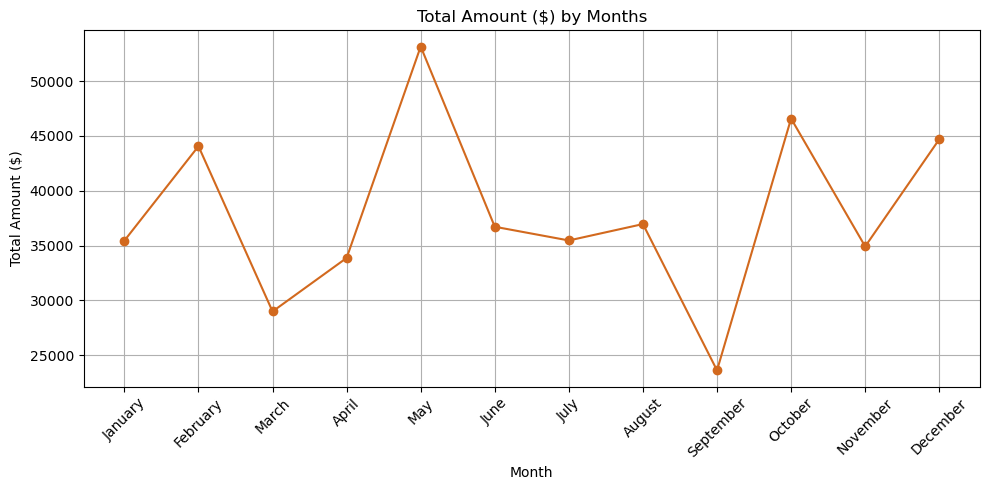

In [65]:
plt.figure(figsize=(10,5))
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_sales = df.groupby('Month')['Total Amount'].sum().reindex(month_order, fill_value=0)
ax = monthly_sales.plot(kind='line', marker='o', color='#D2691E')
ax.set_title("Total Amount ($) by Months")
ax.set_xlabel("Month")
ax.set_ylabel("Total Amount ($)")
ax.set_xticks(range(len(month_order)))
ax.set_xticklabels(month_order, rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [78]:
daily_count=df["Day"].value_counts()
daily_count

Tuesday      161
Saturday     150
Monday       144
Friday       143
Wednesday    139
Sunday       138
Thursday     123
Name: Day, dtype: int64

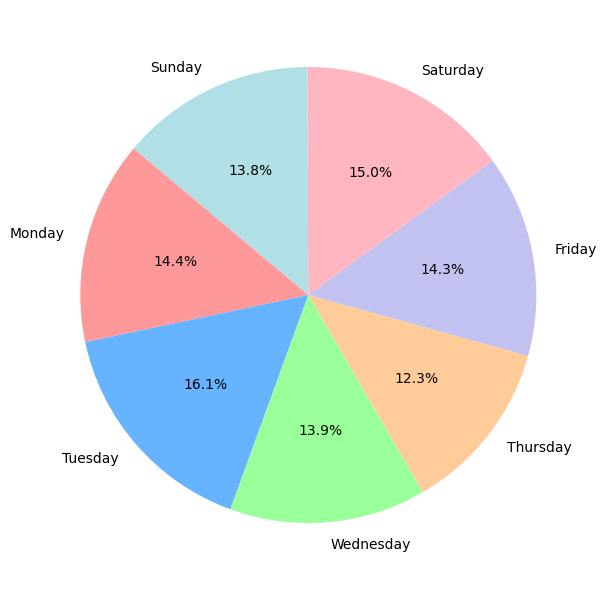

In [81]:
plt.figure(figsize=(8,6))
plt.pie(daily_count, labels=daily_total.index , colors=colors,autopct='%1.1f%%', 
        startangle=140
        )
plt.title("")
plt.tight_layout()
plt.show()

In [71]:
daily_total=month_total=df.groupby("Day")["Total Amount"].sum().sort_values(ascending=False)
daily_total

Day
Saturday     78815
Tuesday      69440
Monday       68720
Friday       66290
Wednesday    58770
Sunday       58600
Thursday     53835
Name: Total Amount, dtype: int64

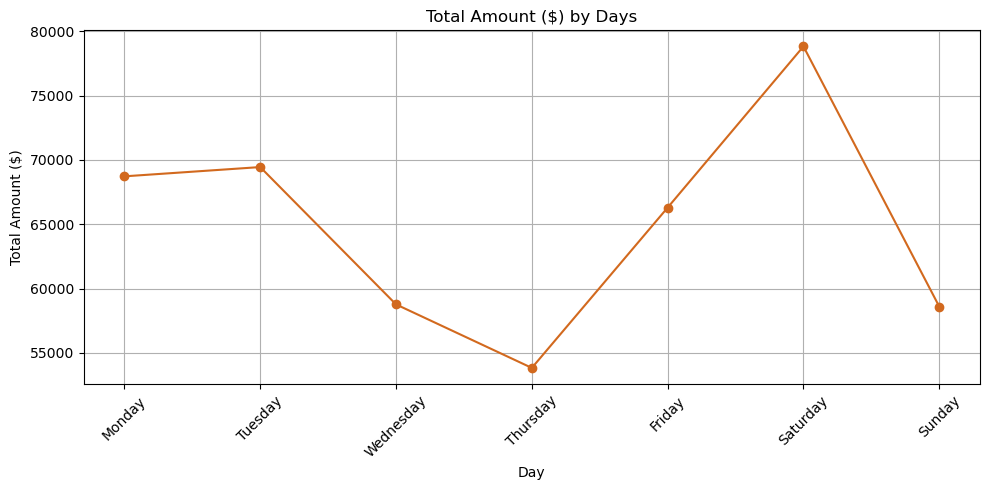

In [73]:
plt.figure(figsize=(10,5))
daily_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_sales = df.groupby('Day')['Total Amount'].sum().reindex(daily_order, fill_value=0)
ax = daily_sales.plot(kind='line', marker='o', color='#D2691E')
ax.set_title("Total Amount ($) by Days")
ax.set_xlabel("Day")
ax.set_ylabel("Total Amount ($)")
ax.set_xticks(range(len(daily_order)))
ax.set_xticklabels(daily_order, rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [92]:
Gender_count=df["Gender"].value_counts()
Gender_count

Female    510
Male      488
Name: Gender, dtype: int64

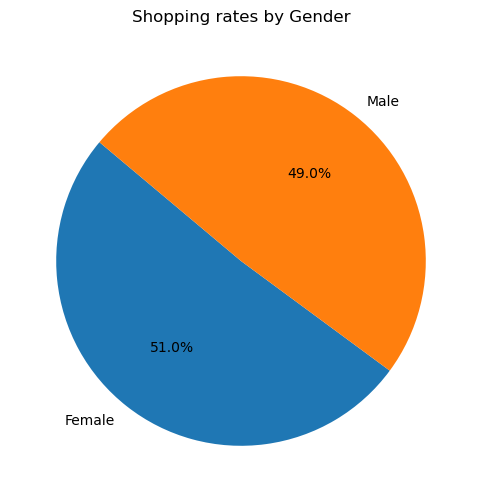

In [11]:
Gender_count=df["Gender"].value_counts()
plt.figure(figsize=(8,6))
plt.pie(Gender_count , labels=Gender_count.index ,autopct='%1.1f%%', 
        startangle=140),
plt.title("Shopping rates by Gender")
plt.show()

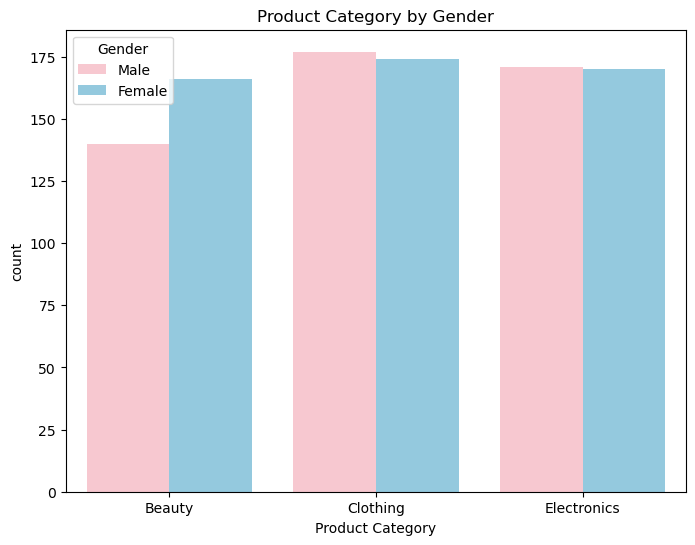

In [104]:
plt.figure(figsize=(8, 6))
sbn.countplot(data=df, x='Product Category', hue='Gender',palette=['pink','skyblue','green'])
plt.title("Product Category by Gender");

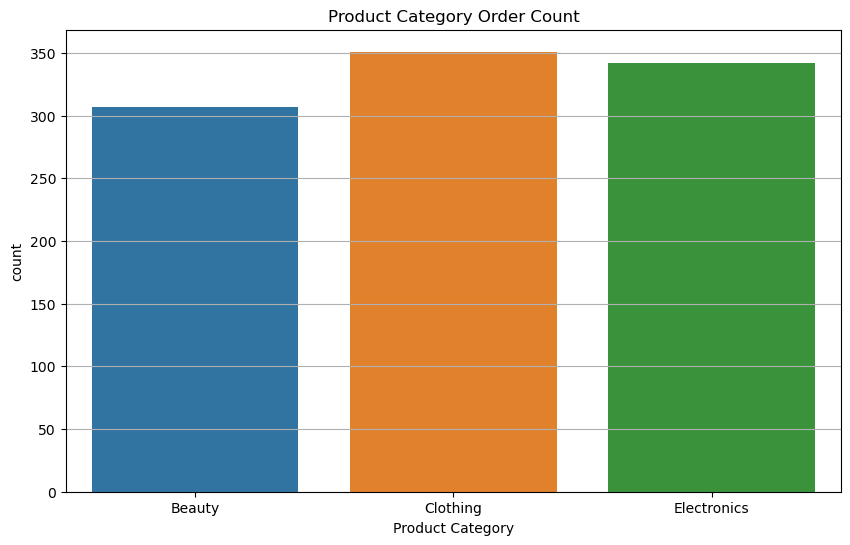

In [15]:
plt.figure(figsize=(10,6))
sbn.countplot(x="Product Category", data=df)
plt.title("Product Category Order Count")
plt.grid(axis="y")

In [54]:
product_totalamount=df.groupby("Product Category")["Total Amount"].sum().sort_values(ascending=False)
product_totalamount

Product Category
Electronics    156875
Clothing       155580
Beauty         142015
Name: Total Amount, dtype: int64

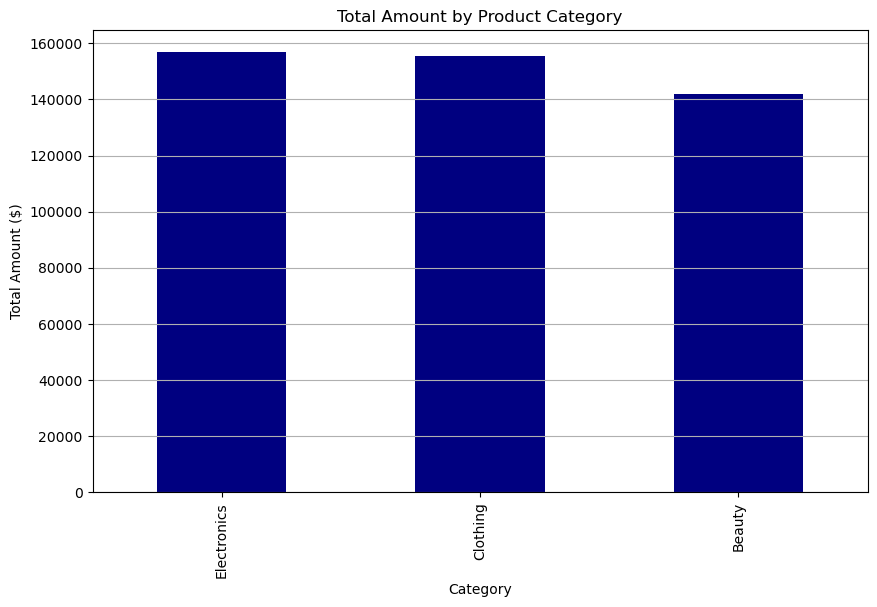

In [70]:
plt.figure(figsize=(10,6))
product_totalamount.plot(kind="bar", color="navy")
plt.title("Total Amount by Product Category")
plt.xlabel("Category")
plt.ylabel("Total Amount ($)")
plt.grid(axis="y")
plt.show()

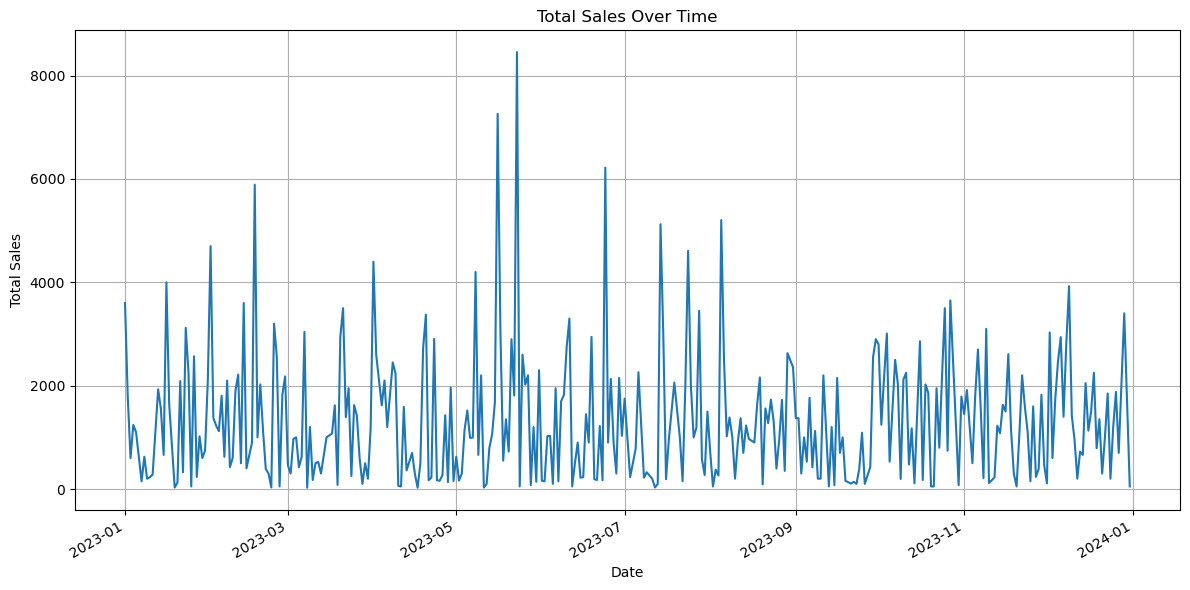

In [100]:
plt.figure(figsize=(12,6))
sales_by_date = df.groupby('Date')['Total Amount'].sum()
sales_by_date.plot()
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

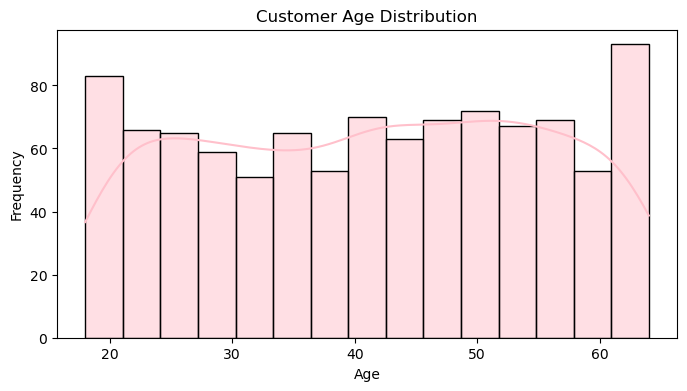

In [94]:
plt.figure(figsize=(8, 4))
sbn.histplot(data=df, x='Age', bins=15, kde=True, color='pink')
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

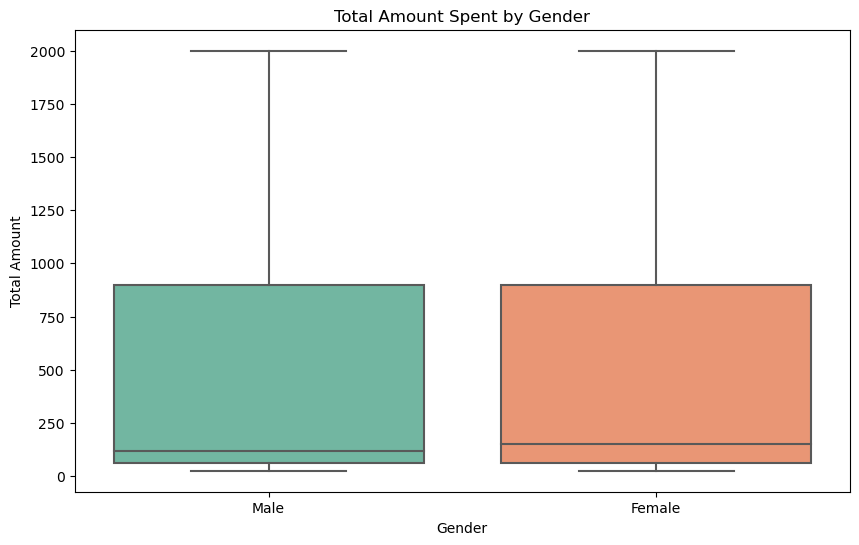

In [97]:
plt.figure(figsize=(10, 6))
palette = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854']
sbn.boxplot(data=df, x='Gender', y='Total Amount', palette=palette)
plt.title('Total Amount Spent by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Amount')
plt.show()

array([[<AxesSubplot:title={'center':'Transaction ID'}>,
        <AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Quantity'}>,
        <AxesSubplot:title={'center':'Price per Unit'}>,
        <AxesSubplot:title={'center':'Total Amount'}>],
       [<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'Month'}>, <AxesSubplot:>]],
      dtype=object)

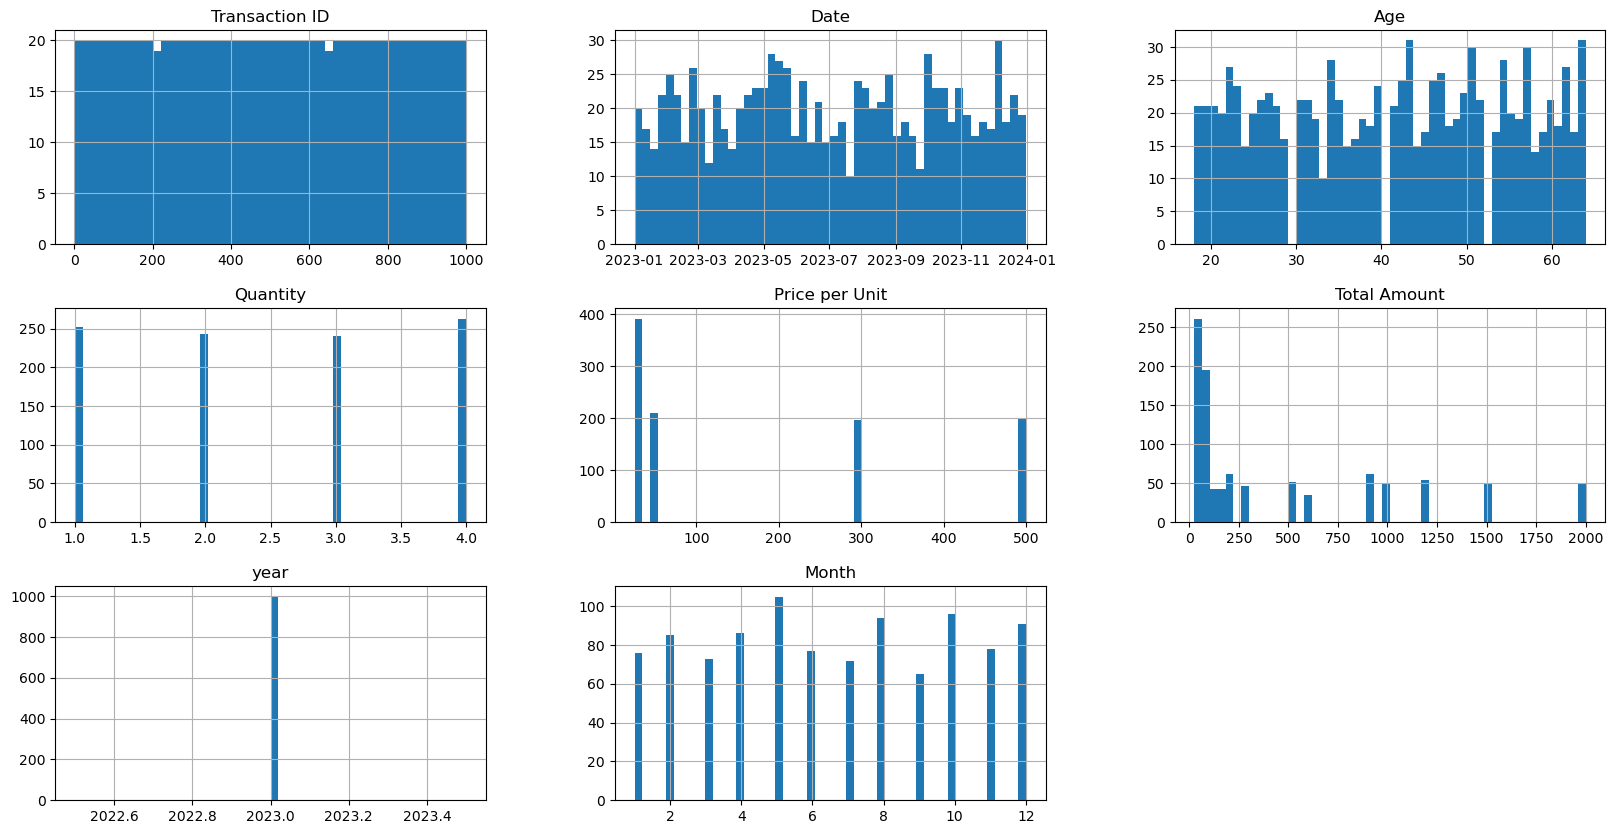

In [53]:
df.hist(figsize=(20,10),bins=50)

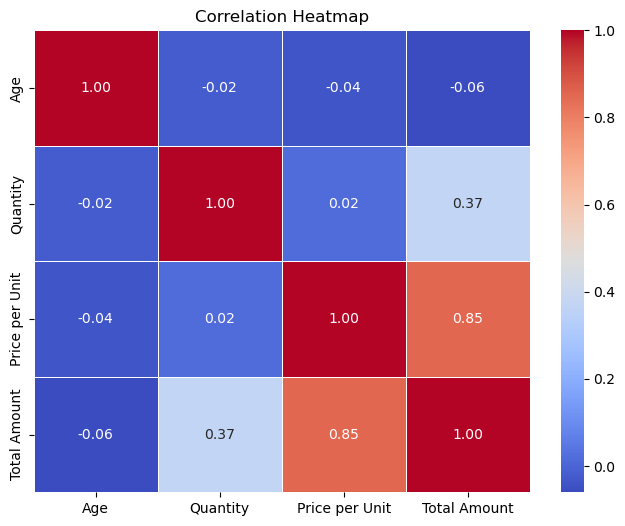

In [102]:
corr = df[['Age', 'Quantity', 'Price per Unit', 'Total Amount']].corr()

plt.figure(figsize=(8, 6))
sbn.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Heatmap')
plt.show()